In [1]:
%conda install matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Multiple Linear Regression

### Least Square Method
Calculate a model that minimizes the sum of squares of the error

,transport,area,price
0,3,4,1000
1,1,12,1100
2,2,24,5000
3,7,40,20000
4,3,75,35000


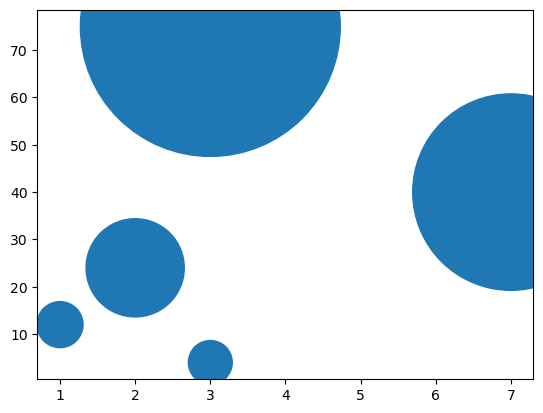

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

example = pd.DataFrame({'transport': [3, 1, 2, 7, 3], 'area': [4, 12, 24, 40, 75], 'price': [1000, 1100, 5000, 20000, 35000]})
display(example)

plt.scatter(example['transport'], example['area'], example['price'])
plt.show()

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(example[['transport', 'area']].to_numpy(), example['price'].to_numpy().reshape(-1, 1))

LinearRegression()

In [12]:
print(f"calculated regression expression: y = {lr.intercept_[0]} + {lr.coef_[0][0]} (Transport) + {lr.coef_[0][1]} (Area) + e")

for i in example.index:
    print(f"{i + 1}th error: {example.loc[i]['price'].reshape(-1, 1) - lr.predict(example.loc[i][['transport', 'area']].to_numpy().reshape(1, -1))}")

calculated regression expression: y = 152.13348416289614 + 790.398610836441 (Transport) + 402.2060344399712 (Area) + e
1th error: [[-3132.15345443]]
2th error: [[-4669.00450828]]
3th error: [[-6385.8755324]]
4th error: [[-1773.16513762]]
5th error: [[2311.21810033]]


### R^2 and Adjusted R^2

In [5]:
import statsmodels.formula.api as sm

results = sm.ols(formula='price ~ transport + area', data = example).fit()
results.summary()

/Users/choijennifer/anaconda3/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     63.26
Date:                Sat, 18 Nov 2023   Prob (F-statistic):             0.0156
Time:                        18:40:31   Log-Likelihood:                -44.155
No. Observations:                   5   AIC:                             94.31
Df Residuals:                       2   BIC:                             93.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6018.9169   2361.104     -2.549      0.126   -1.62e+04    4140.094
transport    980.8811    605.097      1.621      0.246   -1622.642    3584.404
area         493.5515     49.123     10.047      0.010     282.191     704.912
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.469
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.355
Skew:                          -0.502   Prob(JB):                        0.837
Kurtosis:                       2.164   Cond. No.                         81.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of determination is 0.984, and the adjusted coefficient of determination is 0.969, so the model describes most of the data.

### T-test

Null Hypothesis: There is no linear relationship between the two variables. 
Alternative Hypothesis: There is a linear relationship between the two variables.

In [6]:
results = sm.ols(formula='price ~ transport + area', data = example).fit()
results.summary()

/Users/choijennifer/anaconda3/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     63.26
Date:                Sat, 18 Nov 2023   Prob (F-statistic):             0.0156
Time:                        18:40:31   Log-Likelihood:                -44.155
No. Observations:                   5   AIC:                             94.31
Df Residuals:                       2   BIC:                             93.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6018.9169   2361.104     -2.549      0.126   -1.62e+04    4140.094
transport    980.8811    605.097      1.621      0.246   -1622.642    3584.404
area         493.5515     49.123     10.047      0.010     282.191     704.912
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.469
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.355
Skew:                          -0.502   Prob(JB):                        0.837
Kurtosis:                       2.164   Cond. No.                         81.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation
- Transport: Since the p-value is 0.246, there is insufficient evidence to reject the null hypothesis.  
=> There is no linear relationship between transportation convenience and housing prices.

- Area: Since the p-value is 0.01, there is sufficient evidence to reject the null hypothesis at the 99% confidence level.  
=> There is a linear relationship between area and house prices.

### F-test

Null hypothesis: there is no linear relationship between the model and the dependent variable.  
Alternative Hypothesis: There is a linear relationship between at least one independent variable and the dependent variable.

In [13]:
results = sm.ols(formula='price ~ transport + area', data = example).fit()
print(f"F statistic: {results.fvalue}\np-value: {results.f_pvalue}")

F statistic: 63.25821340915956
p-value: 0.015562212936618261


Interpretation
- Since the p-value is 0.016, there is sufficient evidence to reject the null hypothesis at the 98.4% confidence level.  
=> A linear relationship exists between at least one independent variable and the dependent variable!

### Partial F test

Null hypothesis: there is no linear relationship between some independent and dependent variables.  
Alternative Hypothesis: There is a linear relationship between at least one independent variable (among those independent variables) and the dependent variable.

In [14]:
### Partial F testresults = sm.ols(formula='price ~ transport + area', data = example).fit()

hypotheses = '(transport = 0), (area = 0)'
f_test = results.f_test(hypotheses)
print(f"F statistic: {f_test.fvalue}\np-value: {f_test.pvalue}")

F statistic: 63.25821340915957
p-value: 0.015562212936618261


Interpretation
- Since the p-value is 0.016, there is sufficient evidence to reject the null hypothesis at the 98.4% confidence level.  
=> A linear relationship exists between at least one independent variable and the dependent variable!

**There are only two dependent variables, so the partial F test is the same as the regular F test in this situation!**

## Practice

### MLR practice
The following are some of the data regarding diabetic patients. Propose a model to describe diabetes levels using BMI and blood pressure (bp).

In [9]:
from sklearn import datasets
dia = datasets.load_diabetes()

dia = pd.DataFrame(dia['data'], index=dia['target'], columns=dia['feature_names'])
display(dia)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


First, blood pressure, BMI, and diabetes levels are extracted.

In [10]:
dia = dia[['bmi', 'bp']]
display(dia)

,bmi,bp
151.0,0.061696,0.021872
75.0,-0.051474,-0.026328
141.0,0.044451,-0.005670
206.0,-0.011595,-0.036656
135.0,-0.036385,0.021872
...,...,...
178.0,0.019662,0.059744
104.0,-0.015906,-0.067642
132.0,-0.015906,0.017293
220.0,0.039062,0.001215


Now, a model describing diabetes levels is calculated through the least squares method.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(dia.values, dia.index.to_numpy().reshape(-1, 1))

print(f"Model: y = {lr.intercept_[0]} + {lr.coef_[0][0]} (BMI) + {lr.coef_[0][1]} (bp) + e")

Model: y = 152.13348416289614 + 790.398610836441 (BMI) + 402.2060344399712 (bp) + e
